In [13]:
import numpy as np
import pandas as pd
from tqdm import tqdm

import matplotlib.pyplot as plt

In [14]:
"""
Arguments:
    k      - number of arms
    minq   - minimum value of q_star for each arm
    maxq   - maximum value of q_star for each arm
    stddev - standard deviation that randomize the values while action is executed
"""

class Bandit:
    def __init__(self, q_star, stddev=2):
        self.stddev = stddev
        self.q_star = q_star

    def execute(self, arm):
        return self.q_star[arm] + np.random.normal(scale=self.stddev)

In [15]:
bandit = Bandit([4, 5, 3, 3, 1, 2, 0, 1, 5, 1])
print(bandit.q_star)
bandit.execute(3)

[4, 5, 3, 3, 1, 2, 0, 1, 5, 1]


-0.5250516068556346

In [16]:
class RandomAgent:
    def __init__(self, bandit):
        """
        Arguments:
            bandit - bandit that the agent will operate on (used only to set initial values of q_est and n)
        """
        self.q_est =  [0] * len(bandit.q_star)
        self.n =  [0] * len(bandit.q_star)
                
    def act(self, bandit):
        """
        Performs an action (selects an arm randomly) and updates corespondingn q_est and n values
        Arguments:
            bandit - bandit that the agent is operated on
        Returns:
            reward - reward from the bandit (a result of the performed action)
        """
        arm = np.random.randint(len(self.q_est))
        reward = bandit.execute(arm)
        self.n[arm] += 1
        
        # Q_n+1 = Qn + (1 / n) * (R - Q_n)
        self.q_est[arm] += (reward - self.q_est[arm]) / self.n[arm]
        
        return reward

In [17]:
agent = RandomAgent(bandit)
rewards = []
for step in range (1000):
    reward = agent.act(bandit)
    rewards.append(reward)

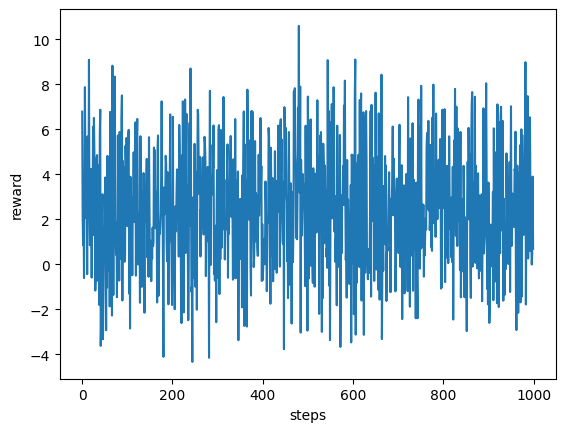

In [18]:
def plot_rewards (rewards):
    """
    Plots the rewards
    """
    f = plt.figure()
    plt.plot(rewards)
    plt.xlabel('steps')
    plt.ylabel('reward')
    plt.show()
    
plot_rewards(rewards)

In [19]:
def display_agent(agent, bandit):
    """
    Displays the agent data, namely:
    q_star - real expected rewards from the bandit
    q_est  - expected rewards extimated by the agent
    n      - how many times the agent selected this particular arm
    """
    df = pd.DataFrame()
    df['q_star'] = bandit.q_star
    df['q_est'] = agent.q_est
    df['n'] = agent.n
    return df

display_agent(agent, bandit)

,q_star,q_est,n
0,4,3.945239,99
1,5,5.264700,84
2,3,3.240655,92
3,3,2.819866,111
4,1,0.984911,110
5,2,2.072884,94
6,0,-0.163422,95
7,1,0.949825,109
8,5,5.073135,93
9,1,1.260512,113


In [20]:
class EpsilonGreedyAgent:
    def __init__(self, bandit, epsilon = 0.1):
        """
        Arguments:
            bandit - bandit that the agent will operate on (used only to set initial values of q_est and n)
            epsilon - exploration parameter 
        """        
        self.q_est = [0] * len(bandit.q_star)
        self.n =  [0] * len(bandit.q_star)
        self.epsilon = epsilon
        
    def act(self, bandit):
        """
        Performs an action (uses epsilon-greedy approach to select an arm)
        and pdates corespondingn q_est and n values
        Arguments:
            bandit - bandit that the agent is operated on
        Returns:
            reward - reward from the bandit (a result of the performed action)
        """        
        if np.random.random() > self.epsilon:
            arm = np.argmax(self.q_est)
        else:
            arm = np.random.randint(len(self.q_est))
        reward = bandit.execute(arm)
        self.n[arm] += 1
        
        # Q_n+1 = Qn + (1 / n) * (R - Q_n)
        self.q_est[arm] += (reward - self.q_est[arm]) / self.n[arm]
        
        return reward

In [21]:
total_rewards = []
for loop in tqdm(range (2000)):
    agent = EpsilonGreedyAgent(bandit)
    rewards = []
    for step in range (1000):
        reward = agent.act(bandit)
        rewards.append(reward)
    
    total_rewards.append(rewards)
total_rewards = np.asarray(total_rewards)
rewards = total_rewards.mean(axis=0)
print (rewards.shape)

100%|██████████| 2000/2000 [00:27<00:00, 71.89it/s]


(1000,)


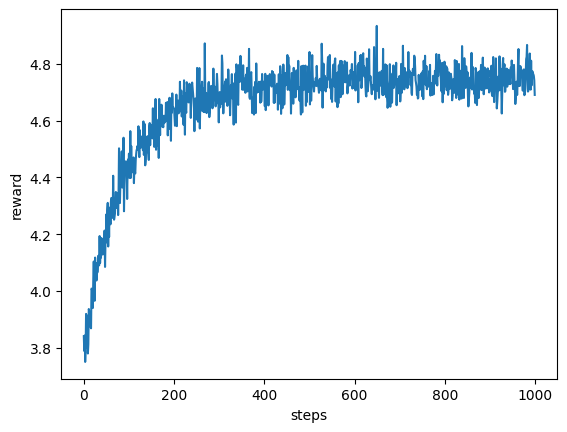

,q_star,q_est,n
0,4,4.021588,16
1,5,5.075158,66
2,3,3.200009,7
3,3,3.721754,6
4,1,1.155663,12
5,2,1.079299,14
6,0,0.594012,12
7,1,0.382186,7
8,5,5.116856,855
9,1,0.192494,5


In [22]:
plot_rewards(rewards)
display_agent(agent, bandit)

In [23]:
df_rewards = pd.DataFrame()
df_rewards['eGreedy'] = rewards